In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('covid_19_clean_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [4]:
data.rename(columns={"Country/Region":"Country"},inplace=True)
data.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Model for Forecasting(Time Series Analysis)**


1.   Fbprophet
2.   ARIMA

**Fbprophet**


*   Developed by Facebook for time series analysis
*   There should only be 2 columns
    1.   Data that you want to forecast (y)
    2.   Date (ds)








In [5]:
### Forecasting for active cases
active = data.groupby('Date')['Active'].sum().reset_index()

In [6]:
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [7]:
### Rename the column
active.rename(columns = {'Date' : 'ds', 'Active' : 'y'}, inplace = True)

In [8]:
active.head()

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


In [9]:
### Import the library and build the model
from fbprophet import Prophet

In [10]:
### build the model
model = Prophet(interval_width=0.95)

In [11]:
### Train the model
model.fit(active)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
### Create the future dataframe
future_dates = model.make_future_dataframe(periods= 40)

In [15]:
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
223,2020-09-01
224,2020-09-02
225,2020-09-03
226,2020-09-04


In [16]:
### Predictions
ypred = model.predict(future_dates)
ypred[['ds','yhat','yhat_lower','yhat_upper']].tail(50)

,ds,yhat,yhat_lower,yhat_upper
178,2020-07-18,5.739660e+06,5.673090e+06,5.814535e+06
179,2020-07-19,5.806946e+06,5.734176e+06,5.876758e+06
180,2020-07-20,5.860686e+06,5.785167e+06,5.932636e+06
181,2020-07-21,5.917417e+06,5.848138e+06,5.987400e+06
182,2020-07-22,5.979813e+06,5.902438e+06,6.051293e+06
183,2020-07-23,6.045263e+06,5.970576e+06,6.114666e+06
184,2020-07-24,6.113295e+06,6.044904e+06,6.177052e+06
185,2020-07-25,6.175456e+06,6.107511e+06,6.249196e+06
186,2020-07-26,6.242742e+06,6.174185e+06,6.313050e+06
187,2020-07-27,6.296482e+06,6.224246e+06,6.367271e+06


In [17]:
active.tail(20)

,ds,y
168,2020-07-08,4964447
169,2020-07-09,5052995
170,2020-07-10,5141244
171,2020-07-11,5227218
172,2020-07-12,5304469
173,2020-07-13,5353468
174,2020-07-14,5427502
175,2020-07-15,5493703
176,2020-07-16,5588524
177,2020-07-17,5664300


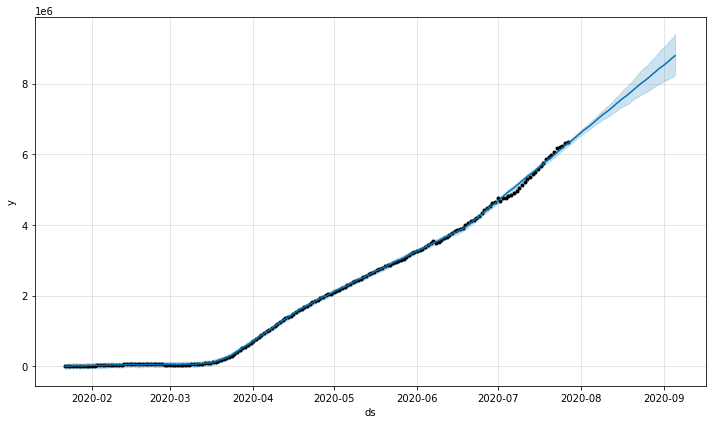

In [18]:
active_plot = model.plot(ypred) # Dark blue dots are the given data and the light blue shade is the predicted data range

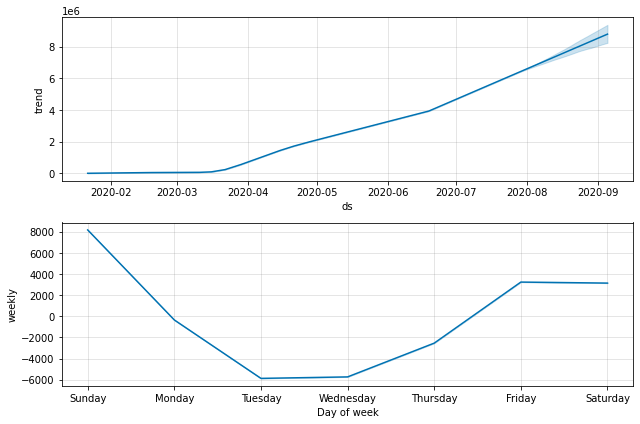

In [19]:
active_weekly_plot = model.plot_components(ypred)

In [20]:
### Forecasting for China
china = data[data['Country']=="China"]
active= china.groupby('Date')['Active'].sum().reset_index()
active

,Date,Active
0,2020-01-22,503
1,2020-01-23,595
2,2020-01-24,858
3,2020-01-25,1325
4,2020-01-26,1970
...,...,...
183,2020-07-23,2695
184,2020-07-24,2807
185,2020-07-25,2916
186,2020-07-26,3056


In [21]:
### Renaming the column
active.rename(columns={"Date":"ds","Active":"y"},inplace=True)
active.head()

,ds,y
0,2020-01-22,503
1,2020-01-23,595
2,2020-01-24,858
3,2020-01-25,1325
4,2020-01-26,1970


In [22]:
### Build the model
model = Prophet(interval_width=0.95)

In [23]:
### Train the model
model.fit(active)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
### Create the future dataframe
future_dates = model.make_future_dataframe(periods=40)

In [25]:
### Predictions
ypred = model.predict(future_dates)
ypred[['ds','yhat','yhat_lower','yhat_upper']].tail(50)

,ds,yhat,yhat_lower,yhat_upper
178,2020-07-18,-4037.591974,-27443.688037,20127.969059
179,2020-07-19,-3982.743601,-26918.043168,20602.536033
180,2020-07-20,-4028.336741,-29193.849319,18611.374413
181,2020-07-21,-4353.863421,-27291.855588,18455.662562
182,2020-07-22,-5503.851635,-30450.623322,19171.271195
183,2020-07-23,-5181.449566,-29311.403617,18926.937928
184,2020-07-24,-5097.042281,-28265.735347,18818.063419
185,2020-07-25,-5239.101573,-29667.129923,18008.041857
186,2020-07-26,-5184.253200,-29147.122804,19053.733893
187,2020-07-27,-5229.846340,-28858.363696,19560.832832


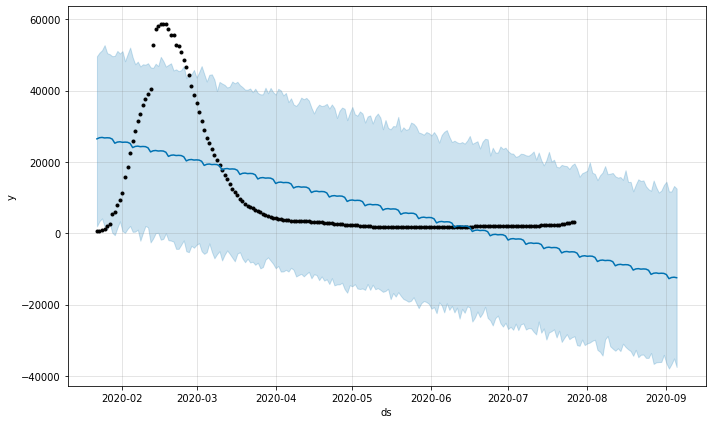

In [26]:
active_plot = model.plot(ypred)

In [36]:
### Forecasting for INDIA
india = data[data['Country']=="India"]
active= india.groupby('Date')['Active'].sum().reset_index()
active

,Date,Active
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
183,2020-07-23,440298
184,2020-07-24,456234
185,2020-07-25,468002
186,2020-07-26,485277


In [37]:
### Renaming the column
active.rename(columns={"Date":"ds","Active":"y"},inplace=True)
active.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [38]:
### Build the model
model = Prophet(interval_width=0.95)

In [39]:
### Train the model
model.fit(active)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
### Create the future dataframe
future_dates = model.make_future_dataframe(periods=40)

In [41]:
### Predictions
ypred = model.predict(future_dates)
ypred[['ds','yhat','yhat_lower','yhat_upper']].tail(50)

,ds,yhat,yhat_lower,yhat_upper
178,2020-07-18,375027.436994,354285.485043,395977.057147
179,2020-07-19,383668.371179,362508.803262,406978.196152
180,2020-07-20,391431.174382,370459.683907,411913.849524
181,2020-07-21,397056.868541,376773.413739,419055.973434
182,2020-07-22,405487.090459,383165.481978,426749.359007
183,2020-07-23,413131.221137,393671.795815,434104.028295
184,2020-07-24,421419.601950,401963.474800,444728.417693
185,2020-07-25,429479.869966,406666.092680,452525.615918
186,2020-07-26,438120.804151,416869.252741,459751.080088
187,2020-07-27,445883.607354,423736.462378,466938.457459


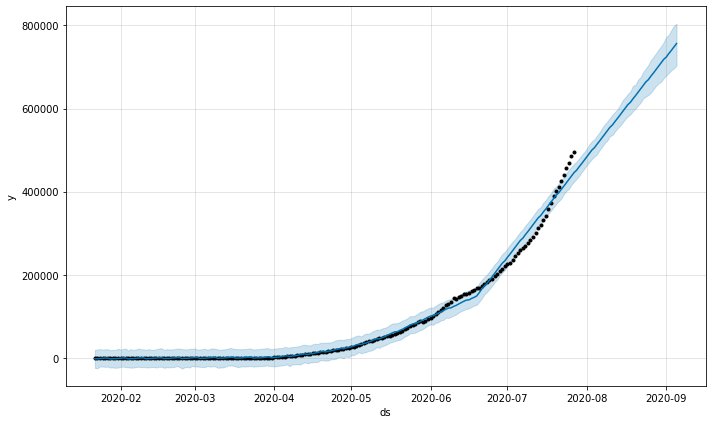

In [42]:
active_plot = model.plot(ypred)